<a href="https://colab.research.google.com/github/SandeshBashyal/naamii_labs_2023/blob/main/00_0_MNIST_Pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Torch

In [ ]:
### Main torch library
import torch
### For Neural Network
import torch.nn as nn

In [ ]:
### You can find dataset there
from torch.utils import data
from torchvision import datasets

## Example Matrix Multiplication

In [ ]:
A = torch.randn(4,4)
A

tensor([[-8.5580e-01,  5.2191e-02, -4.4817e-01, -4.3088e-01],
        [ 1.2990e-01,  5.1331e-01,  1.3316e+00, -1.3093e+00],
        [ 5.2150e-01,  3.0771e-01,  2.4291e+00,  2.0999e+00],
        [ 5.3424e-01,  4.3236e-01, -1.0132e-03,  8.4785e-01]])

In [ ]:
B = torch.randn(4, 3)
B

tensor([[ 0.4851,  0.7823,  1.0929],
        [-1.9071,  0.9326, -0.6973],
        [ 1.8524, -1.0100,  0.6644],
        [ 0.2954, -0.4327, -0.9198]])

In [ ]:
C = torch.matmul(A, B)
C

tensor([[-1.4722,  0.0183, -0.8731],
        [ 1.1640, -0.1981,  1.8730],
        [ 4.7863, -2.6671,  0.0378],
        [-0.3168,  0.4553, -0.4981]])

In [ ]:
C.shape

torch.Size([4, 3])

## Load Dataset

In [ ]:
from torchvision import transforms
to_tensor = transforms.ToTensor()

In [ ]:
train_data = datasets.MNIST(root="./datasets", train=True, download=True, transform=to_tensor)

In [ ]:
test_data = datasets.MNIST(root="./datasets", train=False, download=True, transform=to_tensor)

In [ ]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [ ]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [ ]:
import matplotlib.pyplot as plt

(<matplotlib.image.AxesImage at 0x7ff96d9cb950>, tensor(5))

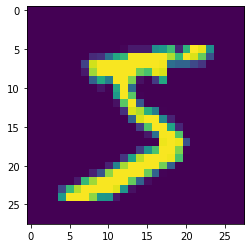

In [ ]:
plt.imshow(train_data.data[0]), train_data.targets[0]

In [ ]:
train_data_loader = data.DataLoader(train_data, shuffle=True, batch_size=32)
test_data_loader = data.DataLoader(test_data, shuffle=True, batch_size=32)

In [ ]:
for inputs, label in train_data_loader:
    print(inputs.shape)
    print(inputs.reshape(32, 784).shape)
    break

torch.Size([32, 1, 28, 28])
torch.Size([32, 784])


### Model - Neural Network

In [ ]:
model = nn.Sequential(
    nn.Linear(28*28, 500),
    nn.ReLU(),
    nn.Linear(500, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

In [ ]:
model

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
for inputs, label in test_data_loader:
    bs = inputs.shape[0]
    
    inputs = inputs.reshape(bs, 28*28)
    outputs = model(inputs)
    out = torch.argmax(outputs, dim=1)
    print("Outputs")
    print(out)
    print("Targets")
    print(label)
    break

Outputs
tensor([4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3,
        3, 4, 3, 3, 3, 4, 4, 4])
Targets
tensor([6, 1, 3, 7, 6, 4, 2, 9, 4, 7, 7, 8, 7, 2, 7, 3, 2, 3, 2, 2, 9, 5, 1, 6,
        3, 0, 4, 7, 0, 7, 9, 9])


## Optimizer

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
error_function = nn.CrossEntropyLoss()

## Training Loop

In [ ]:
# train_loss = []
# test_loss = []
# train_accuracy = []
test_accuracy = []
EPOCHS = 50

In [ ]:
### Find accuracy of Test Dataset
count = 0
accuracy = 0
for inputs, label in test_data_loader:
    ### change shape of input
    bs = inputs.shape[0]
    inputs = inputs.reshape(bs, 28*28)

    ### predict the output
    outputs = model(inputs)
    out = torch.argmax(outputs, dim=1)

    accuracy += (out == label).type(torch.float).sum()
    count += bs
test_accuracy.append(accuracy/count)

In [ ]:
test_accuracy

[tensor(0.1130)]

In [ ]:
for epoch in range(EPOCHS):
    print("Training EPOCH", epoch)
    for inputs, label in train_data_loader:
        ### change shape of input
        bs = inputs.shape[0]
        inputs = inputs.reshape(bs, 28*28)

        ### predict the output
        outputs = model(inputs)

        ### find the error
        error = error_function(outputs, label)

        ### backpropagate
        optimizer.zero_grad()
        error.backward()
        optimizer.step()
    
    ### Find accuracy of Test Dataset
    count = 0
    accuracy = 0
    for inputs, label in test_data_loader:
        ### change shape of input
        bs = inputs.shape[0]
        inputs = inputs.reshape(bs, 28*28)

        ### predict the output
        outputs = model(inputs)
        out = torch.argmax(outputs, dim=1)
        
        accuracy += (out == label).type(torch.float).sum()
        count += bs
    test_accuracy.append(accuracy/count)
    plt.plot(test_accuracy)
    
    
#     print("Outputs")
#     print(out)
#     print("Targets")
#     print(label)
#     break

Training EPOCH 0
Training EPOCH 1
Training EPOCH 2


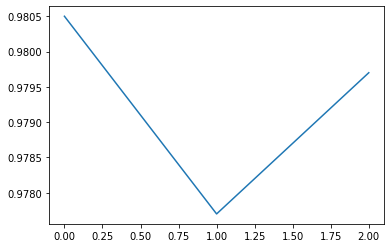

In [ ]:
plt.plot(test_accuracy)

In [ ]:
test_accuracy

[tensor(0.0707),
 tensor(0.9683),
 tensor(0.9757),
 tensor(0.9753),
 tensor(0.9801)]